## Observations and Insights 

%matplotlib inline

In [209]:
### How do upload to github? I created a repository. How does it know to upload this project to the correct repository?

In [284]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on="Mouse ID")
# Display the data table for preview

combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [211]:
# Checking the number of mice.
print(f"Number of Mice: {len(combined_data_df)}")

Number of Mice: 1893


In [291]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data_df[combined_data_df.duplicated(['Mouse ID', 'Timepoint'], keep="first")]

duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [213]:
duplicate_mouse_ids = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [214]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

original_number_of_mice = combined_data_df.groupby(["Mouse ID"]).nunique()

print(f"previous number of mice: {len(original_number_of_mice)}")


combined_data_df.drop(combined_data_df.index[combined_data_df['Mouse ID'] == 'g989'], inplace = True)
clean_df = combined_data_df
new_number_of_mice = clean_df.groupby(["Mouse ID"]).nunique()

print(f"new number of mice: {len(new_number_of_mice)}")

previous number of mice: 249
new number of mice: 248


In [215]:
# Checking the number of mice in the clean DataFrame.

mice = clean_df.groupby(["Mouse ID"]).nunique()
print(f"Number of Mice: {len(mice)}")
print(f"Total Records: {len(clean_df)}")

Number of Mice: 248
Total Records: 1880


## Summary Statistics

In [216]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_grouped = clean_df.groupby(["Drug Regimen"])

mean = drug_grouped["Tumor Volume (mm3)"].mean()

median = drug_grouped["Tumor Volume (mm3)"].median()

variance = drug_grouped["Tumor Volume (mm3)"].var()

std = drug_grouped["Tumor Volume (mm3)"].std()

sem = drug_grouped["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": sem})

summary_statistics.head(5)


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [217]:
mean_agg = clean_df["Tumor Volume (mm3)"].mean()
median_agg = clean_df["Tumor Volume (mm3)"].median()
variance_agg = clean_df["Tumor Volume (mm3)"].var()
std_agg = clean_df["Tumor Volume (mm3)"].std()
sem_agg = clean_df["Tumor Volume (mm3)"].sem()

print(f"Mean: {round(mean_agg, 2)}; Median: {round(median_agg, 2)}; Variance: {round(variance_agg, 2)}; Standard Deviation: {round(std_agg, 2)}; SEM: {round(sem_agg, 2)}")
        
#summary = clean_df["Tumor Volume (mm3)"].agg(["count", "mean","median", "var", "std", "sem"])

#summary                                
                                   

Mean: 50.44; Median: 48.93; Variance: 79.46; Standard Deviation: 8.91; SEM: 0.21


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen'>

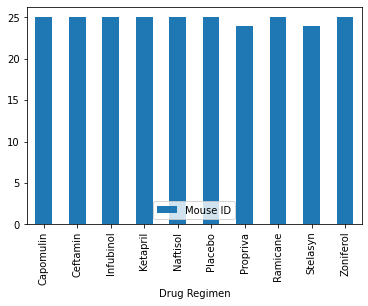

In [218]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


summary_unique_mice = clean_df.loc[:,["Drug Regimen", "Mouse ID"]]

summary_chart = summary_unique_mice.groupby(["Drug Regimen", "Mouse ID"])

drug_regimens = summary_unique_mice.groupby(["Drug Regimen"]).nunique()

summary_df = pd.DataFrame(drug_regimens)

New = summary_df.rename(columns={"Mouse ID": "Number of Mice"})

New

summary_df.plot.bar()

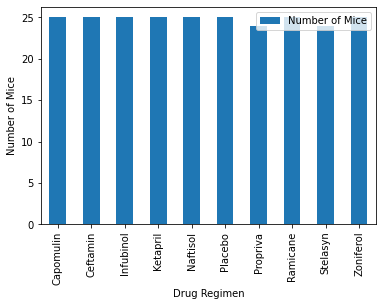

<Figure size 432x288 with 0 Axes>

In [219]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

count_chart = New.plot(kind='bar')

count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice")


plt.show()
plt.tight_layout()

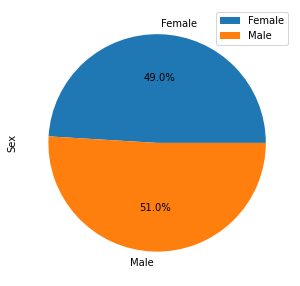

In [220]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_count = mice_grouped["Sex"].count()

df = pd.DataFrame(mice_count)

plot = df.plot.pie(y='Sex', autopct='%1.1f%%', figsize=(5, 5))


[123, 125]

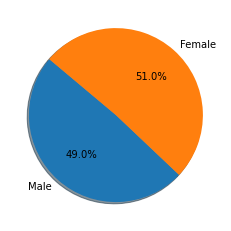

In [258]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_count = mice_grouped["Sex"].count()

df = pd.DataFrame(mice_count)

plt.pie(mice_count, labels=labels, shadow=True, autopct= "%1.1f%%", startangle=140)

mice_list

## Quartiles, Outliers and Boxplots

In [313]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_df.groupby(["Mouse ID"])['Timepoint'].max()

max_tumor
max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_mice = pd.merge(clean_df, max_tumor,
                                 how='right', on=['Mouse ID','Timepoint'])

merge_mice

filtered_drug = merge_mice[merge_mice['Drug Regimen'].str.contains("Capomulin|Ramicane|Infubinol|Ceftamin")]

filtered_drug.sort_values(by=['Drug Regimen']).head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
49,l897,Capomulin,Male,17,19,45,38.846876,1
34,j119,Capomulin,Female,7,23,45,38.125164,1
35,j246,Capomulin,Female,21,21,35,38.753265,1
78,u364,Capomulin,Male,18,17,45,31.023923,3
26,g316,Capomulin,Female,22,22,45,40.159220,2


In [318]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = filtered_drug["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 



    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
        
    # Determine outliers using upper and lower bounds
    

array(['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'], dtype=object)

In [311]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [312]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [96]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
